<a href="https://colab.research.google.com/github/aratimo/sentiment-analysis-user-reviews-electronics/blob/main/image_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/2-Cell_Phones_and_Accessories_5.json'

In [5]:
 df = pd.read_json(file_path,lines=True)

In [6]:
print("Title: ", df.columns)
print("Number of columns: ", len(df.columns))
null_counts = df.isnull().sum()
print("Total number of records:", df.shape[0])
print(null_counts)
print("number of records having images: ",df.shape[0]-1101330)

Title:  Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')
Number of columns:  12
Total number of records: 1128437
overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              523196
reviewerName          135
reviewText            765
summary               517
unixReviewTime          0
vote              1036403
image             1101330
dtype: int64
number of records having images:  27107


In [7]:
df.dropna(subset=['image'], inplace=True)
null_counts = df.isnull().sum()
print(null_counts)

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             11003
reviewerName         16
reviewText           94
summary              19
unixReviewTime        0
vote              14668
image                 0
dtype: int64


In [8]:
print(df.head(10))

      overall  verified   reviewTime      reviewerID        asin  \
249         5      True  10 12, 2015   AHMRKS7TFV645  9638762632   
625         4      True  05 31, 2011   ARTCT91AX3SW1  B00009WCAP   
638         4      True  11 13, 2015  A24Y8B3MAD57SZ  B0000DIDAH   
909         4      True  12 23, 2016  A2K4Z2Q3ZSKQFB  B0002SYC5O   
1202        5     False  09 23, 2005  A2PSC7LUNIDEAH  B00063DKVC   
1307        5      True   05 5, 2008   APY2KYDHD8QIZ  B0006TIA8Y   
1613        3      True  08 27, 2011  A19RTM7MQ3G7ZX  B0009B0IX4   
1982        1      True  08 30, 2006  A2V7EO331SFUF6  B0009W8DLC   
2327        5      True  07 19, 2015  A2YE2GLUQUVLYA  B000DILL8E   
2405        5      True   03 1, 2008  A1N7IP4LAY53CE  B000ELUXIO   

                                                  style    reviewerName  \
249                                                 NaN   Salah Hawsawi   
625                                                 NaN           Jamal   
638   {'Size:': ' Men's 46

In [69]:
import pandas as pd
from PIL import Image
import urllib.request
from io import BytesIO
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}

# assuming the DataFrame is called "df"
image_urls = df['image'].astype(str).str.replace('[', '').str.replace(']', '').astype(str).tolist()[:5]

for url in image_urls[:5]:
  parsed_url = urllib.parse.urlparse(url)
  if parsed_url.scheme and parsed_url.netloc and parsed_url.path:
    print('URL is properly formatted')
  else:
    print('URL is not properly formatted')
  #with urllib.request.urlopen(url) as url_response:
        #img = Image.open(BytesIO(url_response.read()))
        #display(img)

URL is not properly formatted
URL is not properly formatted
URL is not properly formatted
URL is not properly formatted
URL is not properly formatted


<ipython-input-69-e6e564bc8a5d>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  image_urls = df['image'].astype(str).str.replace('[', '').str.replace(']', '').astype(str).tolist()[:5]


In [70]:
from IPython.core.display import display, HTML
display(HTML("<style>pre {white-space: pre-wrap;}</style>"))

image_urls = df['image']
for url in image_urls[:5]:
  print(repr(url))

['https://images-na.ssl-images-amazon.com/images/I/716hrVPQP8L._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/61PNsUzDtDL._SY88.jpg']
['https://images-na.ssl-images-amazon.com/images/I/51qFFxz-+EL._SY88.png', 'https://images-na.ssl-images-amazon.com/images/I/51HrMEZNPVL._SY88.png']
['https://images-na.ssl-images-amazon.com/images/I/61WTWEq4N9L._SY88.jpg']
['https://images-na.ssl-images-amazon.com/images/I/41fz4+VaXBL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41i8fUwONWL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41U1gmfcbxL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41vs73MnqbL._SY88.jpg']
['https://images-na.ssl-images-amazon.com/images/I/4193tjnLksL._SY88.jpg', 'https://images-na.ssl-images-amazon.com/images/I/313Cu9x3JEL._SY88.jpg']


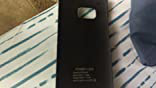

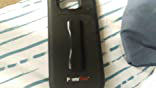

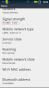

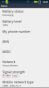

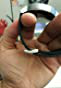

In [71]:
import requests
# extract individual URLs from lists if 'image' column contains lists
image_urls = []
for url_list in df['image']:
    if isinstance(url_list, list):
        for url in url_list:
            image_urls.append(url)
    else:
        image_urls.append(url_list)

# now image_urls should contain all URLs from the 'image' column
#print(image_urls)
for url in image_urls[:5]:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

In [9]:
df = df.dropna(subset=['reviewText'])
df = df.dropna(subset=['summary'])
null_counts = df.isnull().sum()
print(null_counts)

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             10961
reviewerName         16
reviewText            0
summary               0
unixReviewTime        0
vote              14590
image                 0
dtype: int64


In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuations
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    # Lemmatize words
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [12]:
df['sentiment'] = None
from sklearn.model_selection import train_test_split

def map_sentiment(score):
    if score >= 4:
        return 1
    elif score == 3:
        return 0
    else:
        return -1

# Apply the function to the 'overall' column to create a new 'sentiment' column
df['sentiment'] = df['overall'].apply(map_sentiment)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Perform spell checking
    # ...
    # Handle negations
    # ...
    # Handle emojis and emoticons
    # ...
    # Perform lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Perform POS tagging
    tagged_words = nltk.pos_tag(words)
    # Remove non-noun/verb/adjective words
    tagged_words = [(word, tag) for word, tag in tagged_words if tag.startswith('N') or tag.startswith('V') or tag.startswith('J')]
    # Join words back into text
    text = ' '.join([word for word, tag in tagged_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [14]:
null_counts = df.isnull().sum()
print(null_counts)
print(df['reviewText'].head(5))

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             10961
reviewerName         16
reviewText            0
summary               0
unixReviewTime        0
vote              14590
image                 0
sentiment             0
dtype: int64
249                                             Very good
625     I set my phone down on my computer desk for 10...
638     This a high quality band and it feels and look...
909     I always care most about sound quality and sig...
1202    First, let me just say to those who bash this ...
Name: reviewText, dtype: object


In [16]:
train_df['text'] = train_df['reviewText'] + " " + train_df['summary']
val_df['text'] = val_df['reviewText'] + " " + val_df['summary']
test_df['text'] = test_df['reviewText'] + " " + test_df['summary']

nltk.download('punkt')

train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))
val_df['text'] = val_df['text'].apply(lambda x: clean_text(x))
test_df['text'] = test_df['text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to train and evaluate a Naive Bayes model
def train_evaluate_naive_bayes(train_data, val_data, test_data):
    # Define a CountVectorizer to convert text into bag-of-words features
    vectorizer = CountVectorizer()
    
    # Convert the text data into bag-of-words features
    X_train = vectorizer.fit_transform(train_data['text'])
    y_train = train_data['sentiment']
    X_val = vectorizer.transform(val_data['text'])
    y_val = val_data['sentiment']
    X_test = vectorizer.transform(test_data['text'])
    y_test = test_data['sentiment']
    
    # Train a Naive Bayes model on the training set
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='macro')
    val_recall = recall_score(y_val, y_val_pred, average='macro')
    val_f1 = f1_score(y_val, y_val_pred, average='macro')
    
    # Evaluate the model on the test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    # Return the evaluation metrics
    return {
        'val_accuracy': val_accuracy,
        'val_precision': val_precision,
        'val_recall': val_recall,
        'val_f1': val_f1,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }

# Train and evaluate a Naive Bayes model on the data split into train, validation, and test sets
evaluation_results = train_evaluate_naive_bayes(train_df, val_df, test_df)
print(evaluation_results)

{'val_accuracy': 0.8377176732123008, 'val_precision': 0.6103623717091425, 'val_recall': 0.5599670984889632, 'val_f1': 0.546167818132055, 'test_accuracy': 0.8414814814814815, 'test_precision': 0.6003955387576821, 'test_recall': 0.5517331149004772, 'test_f1': 0.5417191340914225}


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_df['text'])
val_features = vectorizer.transform(val_df['text'])
test_features = vectorizer.transform(test_df['text'])

# Train a Linear SVM model on the training data
svm = LinearSVC(random_state=42)
svm.fit(train_features, train_df['sentiment'])

# Predict on the validation and test data
val_predictions = svm.predict(val_features)
test_predictions = svm.predict(test_features)

# Evaluate the model performance on validation and test data
val_accuracy = accuracy_score(val_df['sentiment'], val_predictions)
val_precision = precision_score(val_df['sentiment'], val_predictions, average='weighted')
val_recall = recall_score(val_df['sentiment'], val_predictions, average='weighted')
val_f1 = f1_score(val_df['sentiment'], val_predictions, average='weighted')

test_accuracy = accuracy_score(test_df['sentiment'], test_predictions)
test_precision = precision_score(test_df['sentiment'], test_predictions, average='weighted')
test_recall = recall_score(test_df['sentiment'], test_predictions, average='weighted')
test_f1 = f1_score(test_df['sentiment'], test_predictions, average='weighted')

print('Validation results:')
print(f'Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}')
print('Test results:')
print(f'Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

Validation results:
Accuracy: 0.8614, Precision: 0.8318, Recall: 0.8614, F1: 0.8398
Test results:
Accuracy: 0.8678, Precision: 0.8401, Recall: 0.8678, F1: 0.8494


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'].values.astype('U'))
X_val = vectorizer.transform(val_df['text'].values.astype('U'))
X_test = vectorizer.transform(test_df['text'].values.astype('U'))

# Train a Logistic Regression model on the data
lr_model = LogisticRegression(random_state=42, max_iter=5000)
lr_model.fit(X_train, train_df['sentiment'])

# Evaluate the model on the validation set
val_preds = lr_model.predict(X_val)
val_accuracy = accuracy_score(val_df['sentiment'], val_preds)
val_precision = precision_score(val_df['sentiment'], val_preds, average='weighted')
val_recall = recall_score(val_df['sentiment'], val_preds, average='weighted')
val_f1 = f1_score(val_df['sentiment'], val_preds, average='weighted')

# Evaluate the model on the test set
test_preds = lr_model.predict(X_test)
test_accuracy = accuracy_score(test_df['sentiment'], test_preds)
test_precision = precision_score(test_df['sentiment'], test_preds, average='weighted')
test_recall = recall_score(test_df['sentiment'], test_preds, average='weighted')
test_f1 = f1_score(test_df['sentiment'], test_preds, average='weighted')

# Print the evaluation results
evaluation_results = {
    'val_accuracy': val_accuracy,
    'val_precision': val_precision,
    'val_recall': val_recall,
    'val_f1': val_f1,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1
}
print(evaluation_results)

{'val_accuracy': 0.861430159318266, 'val_precision': 0.8272730645240137, 'val_recall': 0.861430159318266, 'val_f1': 0.8330380338180781, 'test_accuracy': 0.8659259259259259, 'test_precision': 0.8340870810513791, 'test_recall': 0.8659259259259259, 'test_f1': 0.8420975415626792}


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Convert the review text to a bag of words representation
vectorizer = CountVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(train_df["text"])
y_train = train_df["sentiment"]
X_val = vectorizer.transform(val_df["text"])
y_val = val_df["sentiment"]
X_test = vectorizer.transform(test_df["text"])
y_test = test_df["sentiment"]

# Train a random forest classifier on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
val_precision = precision_score(y_val, y_pred, average="weighted")
val_recall = recall_score(y_val, y_pred, average="weighted")
val_f1 = f1_score(y_val, y_pred, average="weighted")

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average="weighted")
test_recall = recall_score(y_test, y_pred, average="weighted")
test_f1 = f1_score(y_test, y_pred, average="weighted")

# Print the evaluation metrics
print("Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1: {val_f1:.4f}")
print()
print("Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1: {test_f1:.4f}")

Validation Metrics:
Accuracy: 0.8340
Precision: 0.8294
Recall: 0.8340
F1: 0.7914

Test Metrics:
Accuracy: 0.8415
Precision: 0.8341
Recall: 0.8415
F1: 0.8032


In [ ]:
import numpy as np

# Split the reviews into words
df['reviewText'] = df['reviewText'].apply(lambda x: x.split())

# Calculate the length of each review (in words)
df['review_length'] = df['reviewText'].apply(len)

# Calculate the average review length
avg_length = np.mean(df['review_length'])
print(f"Average review length: {avg_length} words")

In [87]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Define the maximum number of words to use in the tokenizer
max_words = 10000

# Tokenize the text reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['text'])

# Convert the text reviews to sequences of integer values
X_train = tokenizer.texts_to_sequences(train_df['text'])
X_val = tokenizer.texts_to_sequences(val_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])

# Pad the sequences to a fixed length
max_length = 225
X_train = pad_sequences(X_train, maxlen=max_length)
X_val = pad_sequences(X_val, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Define the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10
model.fit(X_train, train_df['sentiment'], validation_data=(X_val, val_df['sentiment']), batch_size=batch_size, epochs=epochs)

# Evaluate the model on the test set
results = model.evaluate(X_test, test_df['sentiment'])
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Epoch 1/10
338/338 [==============================] - 337s 986ms/step - loss: -1.2614 - accuracy: 0.6985 - val_loss: -2.8920 - val_accuracy: 0.7125
Epoch 2/10
338/338 [==============================] - 332s 983ms/step - loss: -6.7144 - accuracy: 0.7335 - val_loss: -7.1852 - val_accuracy: 0.7406
Epoch 3/10
338/338 [==============================] - 333s 985ms/step - loss: -11.1599 - accuracy: 0.7443 - val_loss: -10.7975 - val_accuracy: 0.7166
Epoch 4/10
338/338 [==============================] - 328s 970ms/step - loss: -17.6291 - accuracy: 0.7489 - val_loss: -16.1657 - val_accuracy: 0.7395
Epoch 5/10
338/338 [==============================] - 332s 982ms/step - loss: -22.7677 - accuracy: 0.7532 - val_loss: -18.6632 - val_accuracy: 0.7217
Epoch 6/10
338/338 [==============================] - 330s 978ms/step - loss: -28.1298 - accuracy: 0.7467 - val_loss: -20.0633 - val_accuracy: 0.6891
Epoch 7/10
338/338 [==============================] - 331s 979ms/step - loss: -33.2134 - accuracy: 0.745

In [88]:
max_num_images = 0
for index, row in df.iterrows():
    num_images = 1 if isinstance(row['image'], str) else len(row['image'])
    max_num_images = max(max_num_images, num_images)

print(f"Maximum number of images in a single record: {max_num_images}")

Maximum number of images in a single record: 35


In [92]:
num_images = []

for i in range(len(df)):
    if isinstance(row['image'], str):
        num_images.append(1)
    else:
        num_images.append(len(row['image']))

avg_images = np.mean(num_images)

print("Average number of images per record:", avg_images)

Average number of images per record: 5.0


In [93]:
df['num_images'] = df['image'].apply(lambda x: len(x) if type(x) == list else 1)

# Count the number of records for each value of num_images
count_by_num_images = df['num_images'].value_counts()

# Print the results
print(count_by_num_images)

1     9761
2     5981
3     4026
4     2574
5     1601
6     1041
7      631
8      442
9      293
10     210
11     115
12     105
13      54
14      54
15      22
20      19
16      18
18      13
17       8
19       6
22       3
24       3
30       3
27       2
33       1
26       1
23       1
28       1
35       1
34       1
31       1
21       1
25       1
Name: num_images, dtype: int64


In [22]:
import os

# directory path
dir_path = "/Users/arati/Desktop"

# check if the directory exists
if os.path.exists(dir_path):
    print(f"{dir_path} exists")

    # check if the directory is writable
    if os.access(dir_path, os.W_OK):
        print(f"{dir_path} is writable")
    else:
        print(f"{dir_path} is not writable")
else:
    print(f"{dir_path} does not exist")

/Users/arati/Desktop does not exist


In [ ]:
import requests
import os
from urllib.parse import urlparse
from PIL import Image
from io import BytesIO

# Set download directory in the Colab environment
download_dir = '/content/images'

# Create directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Extract individual URLs from lists if 'image' column contains lists
image_urls = []
for url_list in df['image']:
    if isinstance(url_list, list):
        for url in url_list:
            image_urls.append(url)
    else:
        image_urls.append(url_list)

total_images = len(image_urls)
print("Total images:", total_images)
count=0

# Download images and save to download directory
for i, url in enumerate(image_urls):
    response = requests.get(url)
    filename = f"image_{i:05}.jpg"
    filepath = os.path.join(download_dir, filename)
    with open(filepath, "wb") as f:
        f.write(response.content)
        count+=1
        #print(f"Image {i} downloaded")
    if count%1000==0: 
      print("1k down")
print("all images downloaded")

In [28]:
import os

directory = 'images'

# Get list of all files and directories
file_list = os.listdir(directory)

# Iterate over each file and directory in the list
for file in file_list:
    # Create full path to the file or directory
    path = os.path.join(directory, file)
    # Check if the path is a file or directory
    if os.path.isfile(path):
        # If it's a file, delete it
        os.remove(path)
    elif os.path.isdir(path):
        # If it's a directory, delete it and all its contents
        os.system(f"rm -r {path}")

In [ ]:
import requests
import os
from urllib.parse import urlparse
import pandas as pd

# specify the directory where you want to save the images
download_dir = "/Users/arati/Desktop/images"

# set the number of records to download images for
num_records = 1000

# loop over the first num_records records
for i in range(num_records):
    # get the image urls for the current record
    image_url = df.loc[i, "image"]
    if isinstance(image_url, str):
        # if there is only one image url, download it
        filename = os.path.basename(urlparse(image_url).path)
        download_path = os.path.join(download_dir, filename)
        response = requests.get(image_url)
        with open(download_path, "wb") as f:
            f.write(response.content)
    elif isinstance(image_url, list):
        # if there are multiple image urls, download each one
        for j, url in enumerate(image_url):
            filename = f"{i}_{j}_{os.path.basename(urlparse(url).path)}"
            download_path = os.path.join(download_dir, filename)
            response = requests.get(url)
            with open(download_path, "wb") as f:
                f.write(response.content)